# Intensive Care in Germany

## Data Source

[DIVI-Intensivregister](https://www.intensivregister.de/) monitors the ICU capacities of 1,300 hospitals in Germany.

## Setup

In [57]:
# standard library
import datetime
import math

In [58]:
# third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Date this Notebook was run

In [59]:
today = datetime.datetime.today().strftime('%Y-%m-%d')
today

'2021-08-21'

In [60]:
# style like ggplot in R
plt.style.use('ggplot')

In [61]:
# Avoid cutting off part of the axis labels, see:
# https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.rcParams.update({'figure.autolayout': True})

## Get Data

In [62]:
timeline_data = "https://diviexchange.blob.core.windows.net/%24web/bundesland-zeitreihe.csv"

In [63]:
timeline_df = pd.read_csv(timeline_data)

In [64]:
timeline_df.tail(3)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,...,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,Stratum_17_Minus,Stratum_18_Bis_29,Stratum_30_Bis_39,Stratum_40_Bis_49,Stratum_50_Bis_59,Stratum_60_Bis_69,Stratum_70_Bis_79,Stratum_80_Plus
8837,2021-08-21T12:15:00+02:00,HAMBURG,24,39,458,82,307,59,28,12,...,4,3,0,0,0,0,0,0,0,0
8838,2021-08-21T12:15:00+02:00,NIEDERSACHSEN,119,36,1353,337,971,342,134,63,...,33,11,0,0,0,0,0,0,0,0
8839,2021-08-21T12:15:00+02:00,DEUTSCHLAND,1310,676,18562,3685,10291,3291,1401,595,...,363,142,3,25,57,103,160,161,94,31


## Rename Columns

### Convert datatype of date column

In [65]:
timeline_df["Datum"] = timeline_df["Datum"].str[:10]
timeline_df.head()

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,...,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,Stratum_17_Minus,Stratum_18_Bis_29,Stratum_30_Bis_39,Stratum_40_Bis_49,Stratum_50_Bis_59,Stratum_60_Bis_69,Stratum_70_Bis_79,Stratum_80_Plus
0,2020-03-20,NORDRHEIN_WESTFALEN,55,35,86,456,0,297,0,49,...,1,0,0,0,0,0,0,0,0,0
1,2020-03-20,RHEINLAND_PFALZ,15,14,48,112,0,62,0,10,...,2,0,0,0,0,0,0,0,0,0
2,2020-03-20,HESSEN,19,7,18,185,0,120,0,16,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-20,BAYERN,45,61,77,392,0,237,0,37,...,1,2,0,0,0,0,0,0,0,0
4,2020-03-20,MECKLENBURG_VORPOMMERN,10,1,8,85,0,59,0,8,...,1,0,0,0,0,0,0,0,0,0


In [66]:
timeline_df.iloc[ : , [0]] = timeline_df.iloc[ : , [0]].apply(pd.to_datetime)

In [67]:
timeline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Datum                                       8840 non-null   datetime64[ns]
 1   Bundesland                                  8840 non-null   object        
 2   Anzahl_Meldebereiche_Erwachsene             8840 non-null   int64         
 3   Aktuelle_COVID_Faelle_Erwachsene_ITS        8840 non-null   int64         
 4   Belegte_Intensivbetten_Erwachsene           8840 non-null   int64         
 5   Freie_Intensivbetten_Erwachsene             8840 non-null   int64         
 6   7_Tage_Notfallreserve_Erwachsene            8840 non-null   int64         
 7   Freie_IV_Kapazitaeten_Gesamt                8840 non-null   int64         
 8   Freie_IV_Kapazitaeten_Davon_COVID           8840 non-null   int64         
 9   Betriebs

In [68]:
federal_level = timeline_df[timeline_df.Bundesland=='DEUTSCHLAND']
federal_level.tail(3)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,...,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,Stratum_17_Minus,Stratum_18_Bis_29,Stratum_30_Bis_39,Stratum_40_Bis_49,Stratum_50_Bis_59,Stratum_60_Bis_69,Stratum_70_Bis_79,Stratum_80_Plus
8805,2021-08-19,DEUTSCHLAND,1310,616,18946,3598,10205,3241,1370,629,...,329,140,3,22,54,105,137,152,88,38
8822,2021-08-20,DEUTSCHLAND,1309,646,18970,3498,10234,3125,1333,625,...,340,137,3,22,54,106,143,153,89,33
8839,2021-08-21,DEUTSCHLAND,1310,676,18562,3685,10291,3291,1401,595,...,363,142,3,25,57,103,160,161,94,31


## Used Beds (Adults)

In [69]:
used_beds = federal_level.loc[ : , ['Datum', 'Belegte_Intensivbetten_Erwachsene']]
used_beds.columns = ['date', 'ICU beds in use (adults)']
used_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 16 to 8839
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      520 non-null    datetime64[ns]
 1   ICU beds in use (adults)  520 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.2 KB


In [70]:
used_beds.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

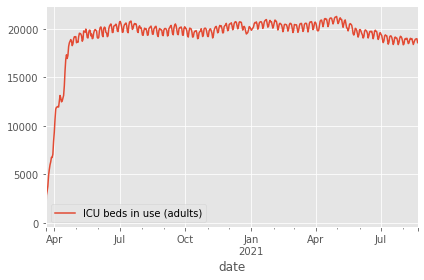

In [71]:
used_beds.plot()

## Covid-19 patients in ICU

In [72]:
icu = federal_level.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]

In [73]:
icu.columns = ['date', 'Covid-19 cases in ICU']
icu.set_index('date', inplace=True)
icu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 520 entries, 2020-03-20 to 2021-08-21
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  520 non-null    int64
dtypes: int64(1)
memory usage: 8.1 KB


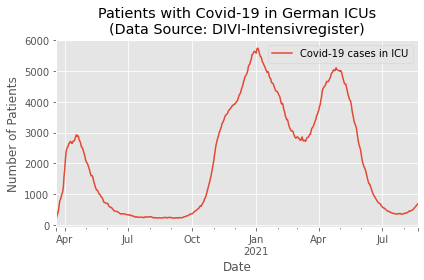

In [74]:
icu_cases = icu.plot(
    title='Patients with Covid-19 in German ICUs\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

In [75]:
fig = icu_cases.get_figure()
fig.savefig('img/covid-19-patients-in-icu-germany.png')

### Situation in North Rhine-Westphalia

NRW ist the state in Germany with the highest number of inhabitants.

In [76]:
nrw = timeline_df[timeline_df.Bundesland=='NORDRHEIN_WESTFALEN']
nrw.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,...,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,Stratum_17_Minus,Stratum_18_Bis_29,Stratum_30_Bis_39,Stratum_40_Bis_49,Stratum_50_Bis_59,Stratum_60_Bis_69,Stratum_70_Bis_79,Stratum_80_Plus
8806,2021-08-20,NORDRHEIN_WESTFALEN,313,203,4601,817,2388,673,326,162,...,78,19,0,0,0,0,0,0,0,0
8823,2021-08-21,NORDRHEIN_WESTFALEN,313,215,4527,821,2392,693,348,150,...,85,21,0,0,0,0,0,0,0,0


In [77]:
icu_nrw = nrw.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_nrw.columns = ['date', 'Covid-19 cases in ICU']
icu_nrw.set_index('date', inplace=True)
icu_nrw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 520 entries, 2020-03-20 to 2021-08-21
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  520 non-null    int64
dtypes: int64(1)
memory usage: 8.1 KB


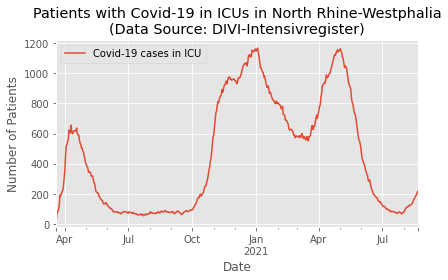

In [78]:
icu_cases_nrw = icu_nrw.plot(
    title='Patients with Covid-19 in ICUs in North Rhine-Westphalia\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

### Situation in Rhineland-Palatinate

In [79]:
rlp = timeline_df[timeline_df.Bundesland=='RHEINLAND_PFALZ']
rlp.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,...,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,Stratum_17_Minus,Stratum_18_Bis_29,Stratum_30_Bis_39,Stratum_40_Bis_49,Stratum_50_Bis_59,Stratum_60_Bis_69,Stratum_70_Bis_79,Stratum_80_Plus
8807,2021-08-20,RHEINLAND_PFALZ,77,29,777,234,418,178,88,35,...,22,6,0,0,0,0,0,0,0,0
8824,2021-08-21,RHEINLAND_PFALZ,77,29,767,241,429,194,100,35,...,24,5,0,0,0,0,0,0,0,0


In [80]:
icu_rlp = rlp.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_rlp.columns = ['date', 'Covid-19 cases in ICU']
icu_rlp.set_index('date', inplace=True)
icu_rlp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 520 entries, 2020-03-20 to 2021-08-21
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  520 non-null    int64
dtypes: int64(1)
memory usage: 8.1 KB


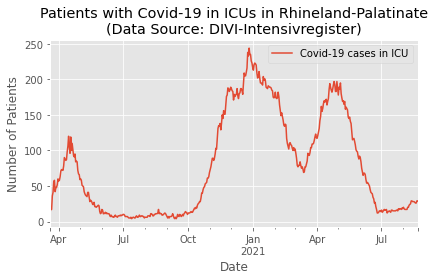

In [81]:
icu_cases_rlp = icu_rlp.plot(
    title='Patients with Covid-19 in ICUs in Rhineland-Palatinate\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

### Situation in Saxony

Saxonia had high case numbers during the pandemic.

In [82]:
saxonia = timeline_df[timeline_df.Bundesland=='SACHSEN']
saxonia.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,...,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,Stratum_17_Minus,Stratum_18_Bis_29,Stratum_30_Bis_39,Stratum_40_Bis_49,Stratum_50_Bis_59,Stratum_60_Bis_69,Stratum_70_Bis_79,Stratum_80_Plus
8819,2021-08-20,SACHSEN,77,19,1166,286,627,293,96,46,...,14,9,0,0,0,0,0,0,0,0
8836,2021-08-21,SACHSEN,77,17,1178,259,637,295,100,43,...,18,9,0,0,0,0,0,0,0,0


In [83]:
icu_saxonia = saxonia.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_saxonia.columns = ['date', 'Covid-19 cases in ICU']
icu_saxonia.set_index('date', inplace=True)
icu_saxonia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 520 entries, 2020-03-20 to 2021-08-21
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  520 non-null    int64
dtypes: int64(1)
memory usage: 8.1 KB


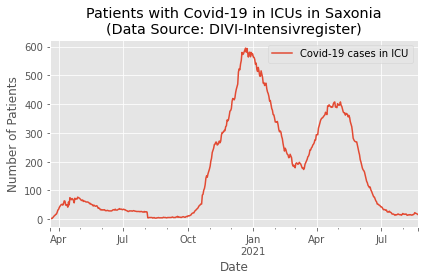

In [84]:
icu_cases_saxonia = icu_saxonia.plot(
    title='Patients with Covid-19 in ICUs in Saxonia\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')